# What is the network learning?

* We can gain some intuition in what the network is learning
* Especially fruitful will turn out to look at the weights of the hidden layer



In [1]:
import h5py
import json
from keras.models import Model, model_from_json
import tensorflow as tf

def load_model(model_name):

    with open(model_name+".model.json", "rt") as f:
        model=model_from_json(f.read())
    model.load_weights(model_name+".weights.h5")
    
    with open(model_name+".vocabularies.json") as f:
        labels,vocab=json.load(f)
    
    return model,labels,vocab

with tf.device('/cpu:0'): # Forces CPU - you don't need this row for anything
    model,labels,vocab=load_model("models/imdb_bow")
    print(model)

/home/ginter/venv-jupyter/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


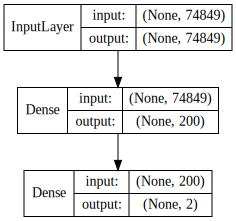

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True,show_layer_names=False).create(prog='dot', format='svg'))


* This is our model (watch out, Keras plots models from top to bottom)
* Hidden layer has 200 nodes with 74849 inputs each, one input for one word in the vocabulary
* We can also look at it the other way around: each word is assigned one weight for each hidden layer node
* So each word is seen by the network as a 200-dimensional vector
* But what are these vectors? What properties should they have? Let us find out!

* We want to visualize the 200-dimensional vectors
* t-SNE is one of the most popular methods for the task, producing a 2D projection
* it is an external program, so we need to run it on the command line
* one can get it here https://github.com/lvdmaaten/bhtsne/
* (takes quite a while to run)


In [13]:
import numpy 
import os
learned_weights=model.layers[1].get_weights()[0]
#numpy.savetxt("imdb_vectors_in.txt",learned_weights) # save vectors to a file
# run tsne locally, input is an embedding matrix, output is an embedding matrix with reduced dimensions
#os.system("python3 bhtsne/bhtsne.py --input imdb_vectors_in.txt --output imdb_vectors_out.txt")

m2d=numpy.loadtxt("imdb_vectors_out.txt") # read new vectors from a file
print("2D projected shape",m2d.shape)

2D projected shape (74849, 2)


Now we can plot the data in 2D, see what we get

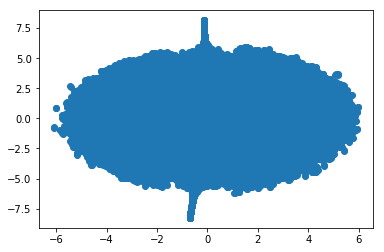

In [15]:
import matplotlib.pyplot as plt
plt.scatter(m2d[:,0],m2d[:,1])

<img src="https://cdn.shopify.com/s/files/1/1061/1924/files/Tears_Emoji_Icon_2.png?11214052019865124406" width="60"/>

* We only need to plot few words, preferrably common ones
* TfidfVectorizer comes to the rescue, because it keeps track of word counts

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import json
import random
import numpy

with open("data/imdb_train.json") as f:
    data=json.load(f)
random.shuffle(data) #play it safe!
texts=[one_example["text"] for one_example in data]

vectorizer=CountVectorizer(vocabulary=vocab)
feature_matrix=vectorizer.fit_transform(texts)




In [35]:
word_counts=numpy.asarray(numpy.sum(feature_matrix,axis=0)).flatten()
print(word_counts)

[ 93 300   1 ...   1   4   1]


In [37]:
words=sorted(vocab.items(),key=lambda word_idx:word_idx[1])
#words_by_count=sorted(zip(words,word_counts), key=lambda word_count:word_count[1],reverse=True)
print(words_by_count[:100])

[(('the', 66339), 336749), (('and', 3258), 164140), (('of', 46680), 145864), (('to', 67125), 135724), (('is', 34585), 107332), (('it', 34683), 96467), (('in', 33004), 93976), (('this', 66562), 76007), (('that', 66322), 73286), (('was', 72196), 48209), (('as', 4465), 46935), (('for', 25450), 44345), (('with', 73342), 44130), (('movie', 44147), 44047), (('but', 9881), 42623), (('film', 24536), 40159), (('you', 74324), 34267), (('on', 46916), 34202), (('not', 46050), 30632), (('he', 30211), 30155), (('are', 4124), 29438), (('his', 31095), 29376), (('have', 30118), 27731), (('be', 6334), 26957), (('one', 46932), 26795), (('all', 2662), 23985), (('at', 4753), 23516), (('they', 66474), 22915), (('by', 9962), 22548), (('an', 3167), 21564), (('who', 72904), 21441), (('so', 61380), 20614), (('from', 26180), 20499), (('like', 38755), 20281), (('there', 66432), 18865), (('her', 30646), 18424), (('or', 47142), 18007), (('just', 35787), 17774), (('about', 1277), 17375), (('out', 47449), 17113), (('

In [57]:
#to_plot=list(elem[0][1] for elem in words_by_count[:1000])
#plt.subplots(figsize=(4, 4), dpi=500)
#plt.scatter(m2d[to_plot,0],m2d[to_plot,1])
#for ((word,idx),count) in words_by_count[:10000:20]:
#    plt.text(m2d[idx][0],m2d[idx][1],word,size=5)
#plt.ylim(5,8)
#plt.show()

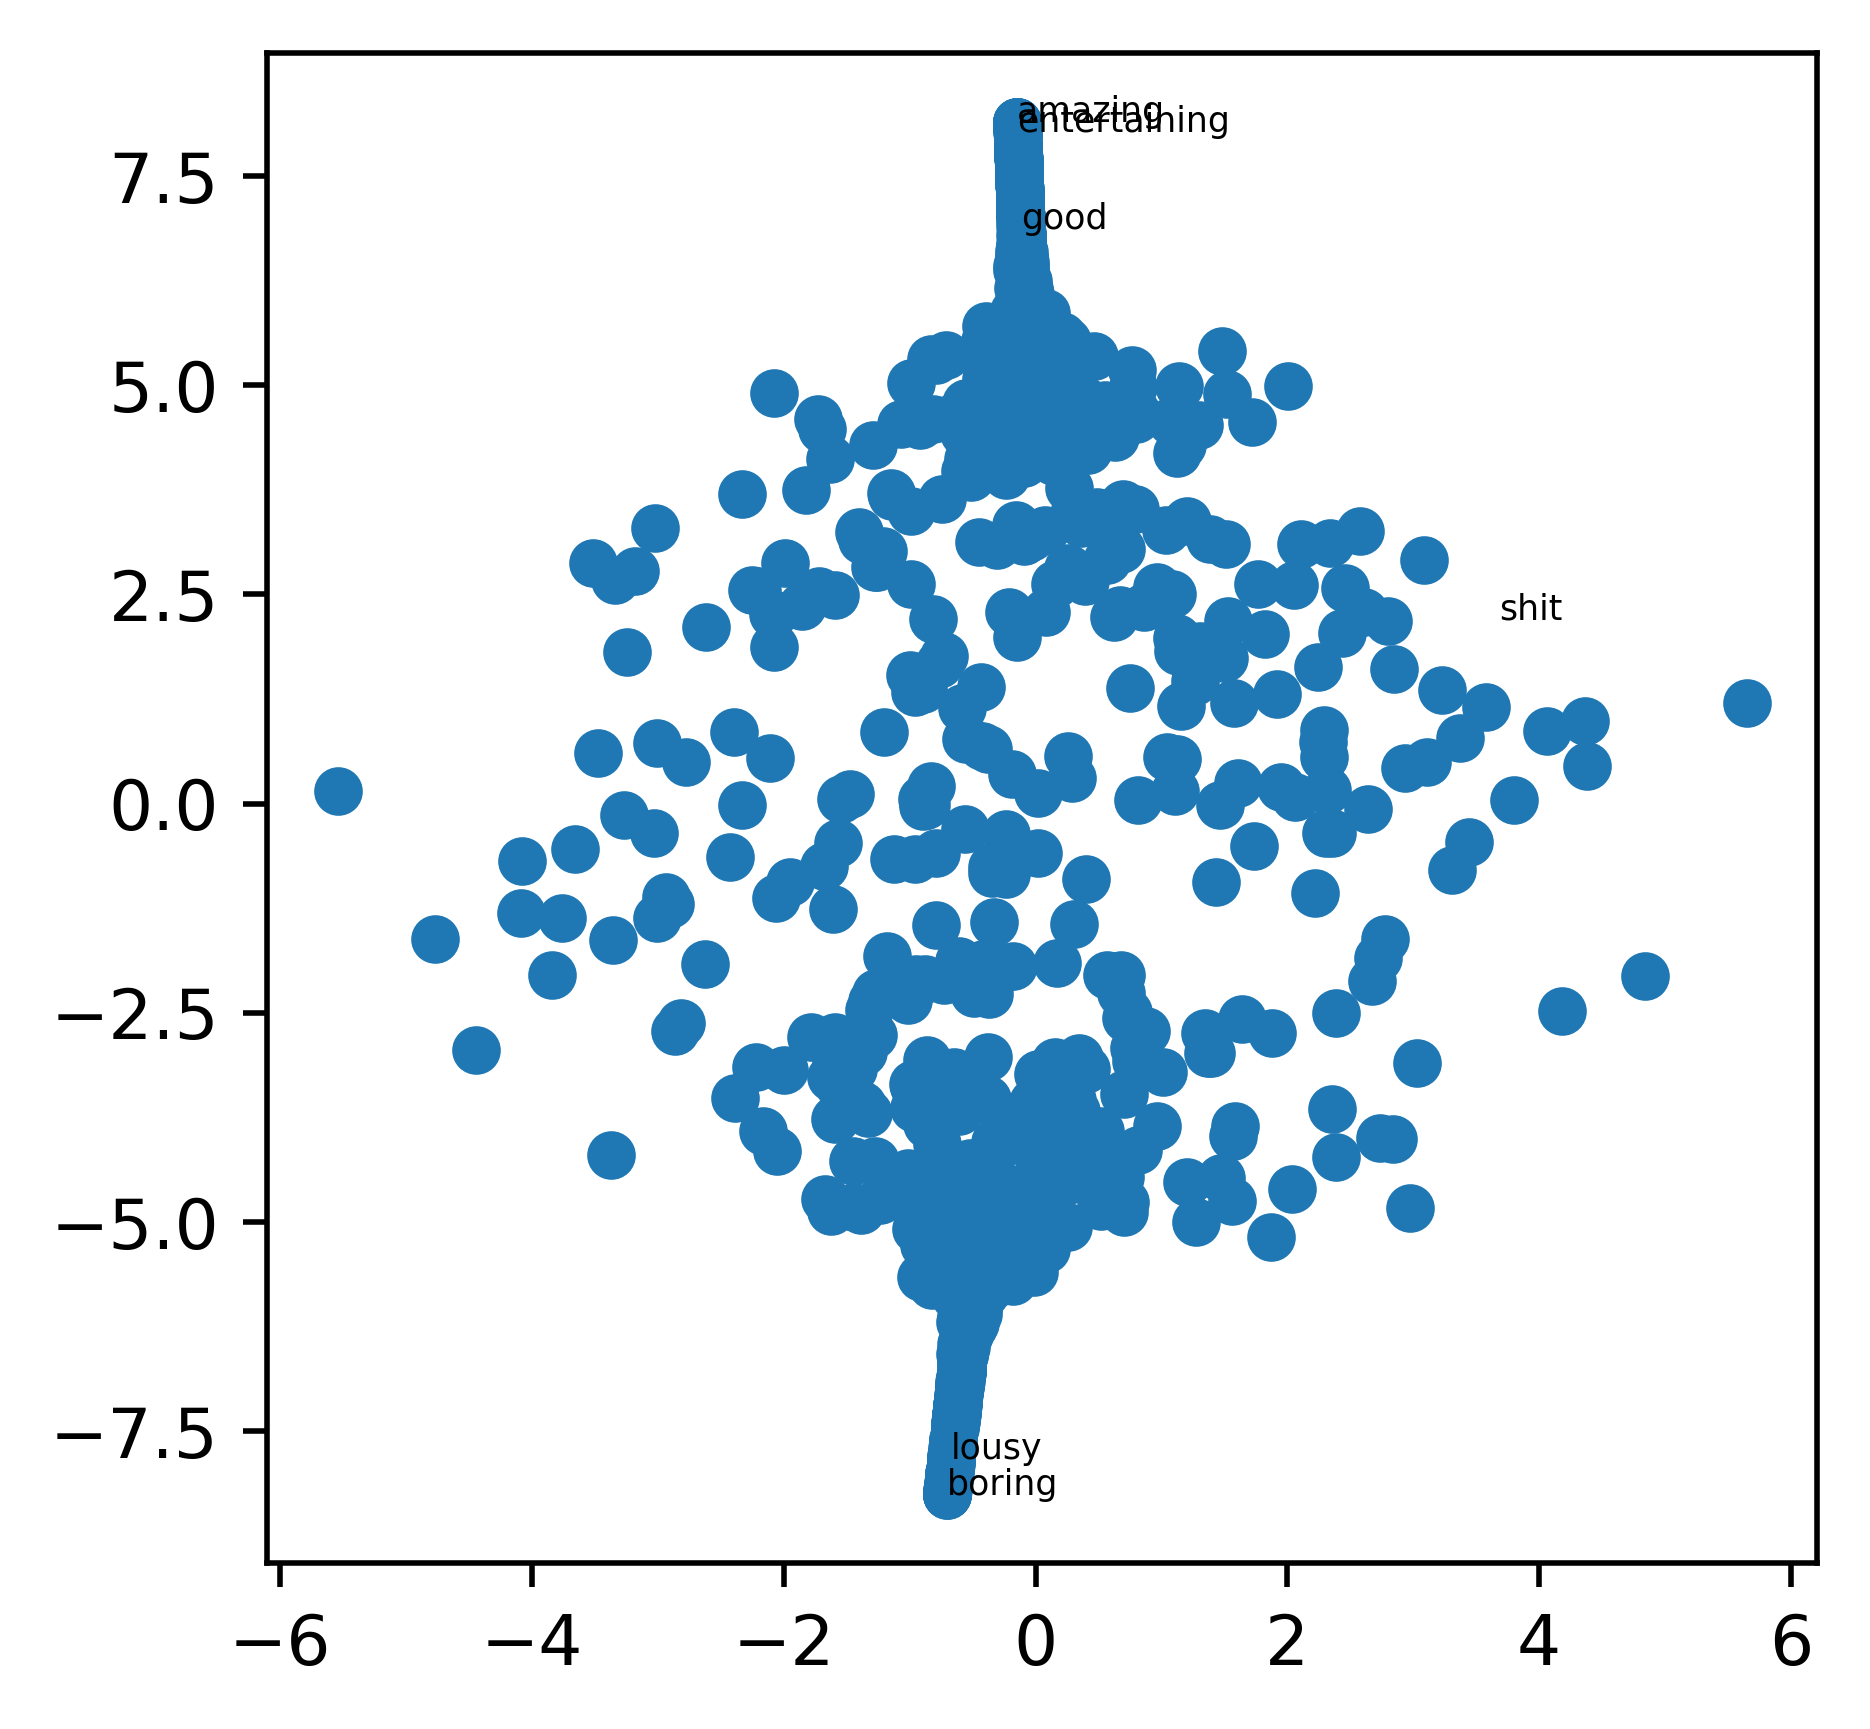

In [63]:
plt.figure(figsize=(4, 4), dpi=500)
to_plot=list(elem[0][1] for elem in words_by_count[:1000])
plt.scatter(m2d[to_plot,0],m2d[to_plot,1])
for wrd in "amazing,boring,good,shit,lousy,entertaining".split(","):
    idx=vocab[wrd]
    plt.text(m2d[idx][0],m2d[idx][1],wrd,size=5)
plt.show()

In [77]:
indices=numpy.where((m2d<-6)[:,1])
idx2word=[None]*len(vocab)
for w,i in vocab.items():
    idx2word[i]=w
for i in indices[0]:
    print(idx2word[i],sep=", ")
print()

1930
30
50
70s
ability
absurd
accent
acting
actor
acts
ad
adequate
advice
affair
aged
aka
alas
aliens
allow
alright
altogether
am
amateurish
amount
animal
annoyed
annoying
anti
any
anything
appalling
apparently
appeal
appears
aren
arminass
army
artsy
ashamed
asking
asleep
assignment
atrocious
attempt
attempts
attractive
author
avoid
awful
awfully
bad
badly
baldwin
bare
barely
bargain
basically
bbc
bear
been
behave
behavior
believer
beloved
below
better
biggest
bizarre
blah
blame
bland
blatant
blatantly
blonde
blood
bomb
boom
bore
bored
boredom
boring
bother
bothered
bottom
box
brain
build
bunch
button
camera
candy
car
cardboard
care
caricatures
channel
charisma
charles
chase
cheap
cheated
cheese
chick
christian
christmas
cliché
clichés
clothing
clumsy
co
coherent
college
company
complete
completely
concept
conclusion
confess
confusing
connect
context
contrived
conveniently
convince
cop
costs
could
couldn
crap
crappy
create
credibility
cult
danger
daughter
decent
decide
defense
demon
de

In [ ]:
words=sorted(vocab.items(),key=lambda item: item[1])
learned_weights=model.layers[1].get_weights()[0]
with open("models/imdb_bow_learned.vectors","wt") as f:
    print(*model.layers[1].get_weights()[0].shape,file=f)
    for word,weights in zip(words,learned_weights):
        print(word[0].replace(" ","_"),*weights,file=f)
    